## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head(10)
study_results.head(10)



# Combine the data into a single dataset
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [20]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Display the data table for preview. This should be the combined data for both.
merge_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [22]:
# Checking the number of mice
merge_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merge_df.loc[merge_df["Mouse ID"]== "g989"]
duplicate_mouse.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Optional: Get all the data for the duplicate mouse ID. 



In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df = merge_df.drop(merge_df.loc[merge_df["Mouse ID"]== "g989"].index)
merge_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [26]:
# Checking the number of mice in the clean DataFrame.
merge_df.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Groupby Drug Regimen

grouped_table_df = merge_df.groupby(["Drug Regimen"])

# Calculate mean, median, std, variance, sem.
tumor_volume_mean = grouped_table_df["Tumor Volume (mm3)"].mean()
tumor_volume_median = grouped_table_df["Tumor Volume (mm3)"].median()
tumor_volume_std = grouped_table_df["Tumor Volume (mm3)"].std()
tumor_volume_var = grouped_table_df["Tumor Volume (mm3)"].var()
tumor_volume_sem = grouped_table_df["Tumor Volume (mm3)"].sem()

# Name the Columns of the table
summary_table = pd.DataFrame({"Avg Tumor Volume": tumor_volume_mean, "Median Tumor Volume": tumor_volume_median, "Variance Tumor Volume": tumor_volume_var, "Standard Deviation Tumor Volume": tumor_volume_std,  "Standard Error Tumor Volume": tumor_volume_sem})
summary_table


#sum_table.head(5)

## You need to do a separate calculation for each mean, median, std, deviation all has to do with the volume. THe table is already set up, 
# grouped by Drug Regimen. You have to include groupby. when doing each calculation as well.

# sum_table_totals = sum_table["Mouse ID", "Drug Regimen"].count()
# sum_table_totals.head(10)
# most__popular_items_totals = most_popular_items["Item ID", "Item Name"].count()



,Avg Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

merge_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','std','var','sem']})

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

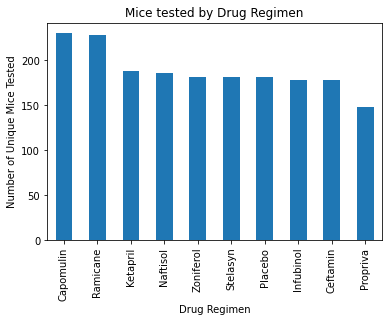

<Figure size 432x288 with 0 Axes>

In [29]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Need to groupby "Drug Regimen"
#grouped_table_df = merge_df.groupby(["Drug Regimen"])
# unique_items = len(grouped_table_df["Drug Regimen"].unique())


drug_regimen_group = merge_df.groupby(["Drug Regimen"])

#mouse_count = drug_regimen_group["Mouse ID"].value_counts(1)
# mouse_count_df = pd.DataFrame(mouse_count)

mouse_count = drug_regimen_group["Mouse ID"].count()

# Need to sort the values to display highest count on the left side of the chart.
mouse_count_sorted = mouse_count.sort_values(ascending=False)

# Create a bar chart
mouse_chart = mouse_count_sorted.plot(kind='bar', title ="Mice tested by Drug Regimen")

mouse_chart.set_xlabel("Drug Regimen")
mouse_chart.set_ylabel("Number of Unique Mice Tested")




plt.show()
plt.tight_layout()

# How would I get the unique number of mice



TypeError: unhashable type: 'numpy.ndarray'

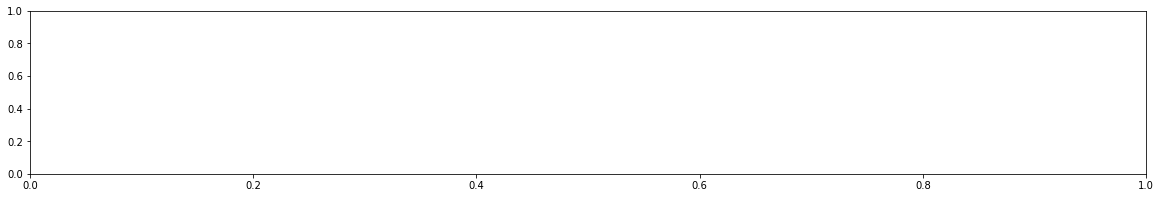

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

### use plt.bar function

import numpy as np
# group by "Drug Regimen"
drug_regimen_group2 = merge_df.groupby(["Drug Regimen"])
# set x axis and tick locations
x_axis = np.arange(len(drug_regimen_group2))
tick_locations = [value+0.4 for value in x_axis]

# create a list
plt.figure(figsize=(20,3))
plt.bar(x_axis, drug_regimen_group["Mouse ID"], color='r', alpha=0.5)
#plt.xticks(tick_locations, drug_regimen_group["Drug Regimen"], rotation="vertical")



#plt.bar
#plt.show

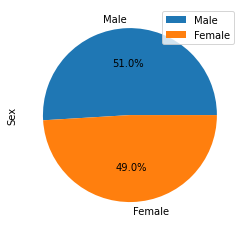

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# May not need to group by sex
#gender_group = merge_df.groupby(["Sex"])

gender = ["Male", "Female"]

gender_count = merge_df["Sex"].value_counts(0)
gender_count_df = pd.DataFrame(gender_count)
gender_count

gender_pie = gender_count_df.plot(kind="pie", y="Sex",autopct="%1.1f%%")
gender_pie.set_ylabel("Sex")

plt.show()



ValueError: x must be 1D

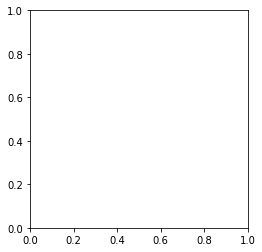

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

### Use plt.pie function

gender = ["Male", "Female"]
data = [gender_count]

plt.pie(data, labels = gender, autopct="%1.1f%%")
#plt.pie.set_ylabel("Sex")

plt.show


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# the greatest timepoint for each mouse is 45
find_last_timepoint = merge_df.query("Timepoint == 45")

# Create a list
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# use isin to sort for the four drug types

drug_with_timepoint = find_last_timepoint[find_last_timepoint["Drug Regimen"].isin(drugs)]
drug_with_timepoint.head(20)




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = drug_with_timepoint["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of occupancy is: 33.48002734
The upper quartile of occupancy is: 62.14221369
The interquartile range of occupancy is: 28.66218635


In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_with_timepoint.boxplot(column="Tumor Volume (mm3)",by = "Drug Regimen", figsize=(20, 16))

drug_names = sorted(df.summary_table.unique())


For i in range(len(drug_names)):
    y = drug_with_timepoint.query(f"Drug Regimen == '{drug_names[i]}'")["Tumor Volume (mm3)"]
    x = np.random.normal(1+i, 0.04, size=y.shape[0])
    plt.plot(x,y, 'r', alpha=0.2, markersize=10)
    
plt.xticks(rotation=45)





SyntaxError: invalid syntax (<ipython-input-17-ef57420daa5f>, line 8)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

grouped_table_df = merge_df.groupby(["Drug Regimen"])

tumor_volume_max = grouped_table_df["Tumor Volume (mm3)"].()







In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
